In [1]:
#importing required libraries
import tensorflow as tf 
import os
import imghdr
import shutil
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
directory = 'compressed_dataset' 

In [6]:
os.listdir(directory)

['Australia',
 'Brazil',
 'Canada',
 'Finland',
 'France',
 'Japan',
 'Russia',
 'South Africa',
 'Spain',
 'United Kingdom',
 'United States']

In [7]:
#reading an image
img=cv2.imread(os.path.join('compressed_dataset','Australia','canvas_1629504043.jpg'))

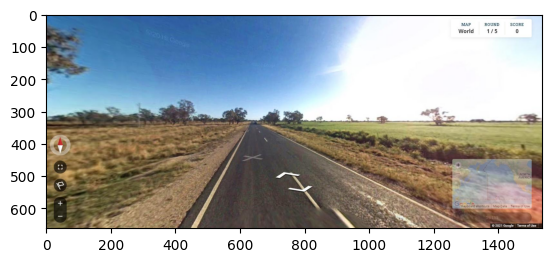

In [8]:
#displaying the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
data_dir='compressed_dataset'

In [10]:
length=0
newdict=dict()

In [11]:
#how many images for each country
for image_class in os.listdir(data_dir):
    length=0
    for image in os.listdir(os.path.join(data_dir, image_class)):
        length=length+1
    newdict[image_class]=length

In [12]:
newdict

{'Australia': 1704,
 'Brazil': 2320,
 'Canada': 1382,
 'Finland': 1049,
 'France': 3573,
 'Japan': 3840,
 'Russia': 1761,
 'South Africa': 1183,
 'Spain': 1075,
 'United Kingdom': 2484,
 'United States': 12014}

In [13]:
sorteddict=dict(sorted(newdict.items(), key=lambda item: item[1]))

In [14]:
sorteddict

{'Finland': 1049,
 'Spain': 1075,
 'South Africa': 1183,
 'Canada': 1382,
 'Australia': 1704,
 'Russia': 1761,
 'Brazil': 2320,
 'United Kingdom': 2484,
 'France': 3573,
 'Japan': 3840,
 'United States': 12014}

In [15]:
#removing countries with less than 1000 images each
for image_class in os.listdir(data_dir):
    if newdict[image_class]<1000:
        folder_path=os.path.join(data_dir,image_class)
        print(folder_path)
        try:
            shutil.rmtree(folder_path)
            print('folder removed',image_class)
        except Exception as e: 
            print('Issue with folder') 

In [16]:
countries=list()
for i in os.listdir(data_dir):
    countries.append(i)

In [ ]:
countries

In [ ]:
#SPLITTING DATA

In [19]:
dataset_path = 'compressed_dataset'
train_path = 'train_data'
validation_path = 'validation_data'

In [20]:
# Create validation directory if not exists
os.makedirs(validation_path, exist_ok=True)

# Specify the percentage of data to move to validation (e.g., 20%)
validation_percentage = 0.2

for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    images = os.listdir(class_path)
    
    # Calculate the number of images to move to validation
    num_validation = int(len(images) * validation_percentage)

    # Move images to the validation folder
    for img in images[:num_validation]:
        src_path = os.path.join(class_path, img)
        dest_path = os.path.join(validation_path, class_folder, img)
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        shutil.move(src_path, dest_path)

In [21]:
# Use ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [22]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
# Set up batch size and image dimensions
batch_size = 32
img_height = 150
img_width = 150
num_classes = 11

In [ ]:
# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Using categorical for more than two classes
    shuffle=True
)

In [12]:
validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 6472 images belonging to 11 classes.


In [13]:
# Build a Convolutional Neural Network (CNN) model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Use softmax for multi-class classification
])

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/20
809/809 [==============================] - 275s 340ms/step - loss: 2.0064 - accuracy: 0.3698 - val_loss: 1.9247 - val_accuracy: 0.3724
Epoch 2/20
809/809 [==============================] - 270s 334ms/step - loss: 1.9174 - accuracy: 0.3806 - val_loss: 1.8430 - val_accuracy: 0.3860
Epoch 3/20
809/809 [==============================] - 271s 335ms/step - loss: 1.8400 - accuracy: 0.3983 - val_loss: 1.7441 - val_accuracy: 0.4197
Epoch 4/20
809/809 [==============================] - 272s 336ms/step - loss: 1.7484 - accuracy: 0.4221 - val_loss: 1.7215 - val_accuracy: 0.4304
Epoch 5/20
809/809 [==============================] - 255s 315ms/step - loss: 1.6779 - accuracy: 0.4463 - val_loss: 1.6221 - val_accuracy: 0.4553
Epoch 6/20
809/809 [==============================] - 254s 314ms/step - loss: 1.6347 - accuracy: 0.4585 - val_loss: 1.5543 - val_accuracy: 0.4903
Epoch 7/20
809/809 [==============================] - 254s 313ms/step - loss: 1.5759 - accuracy: 0.4784 - val_loss: 1.5294 -

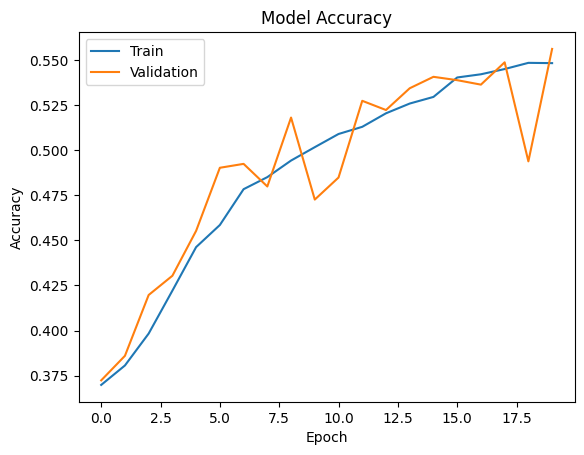

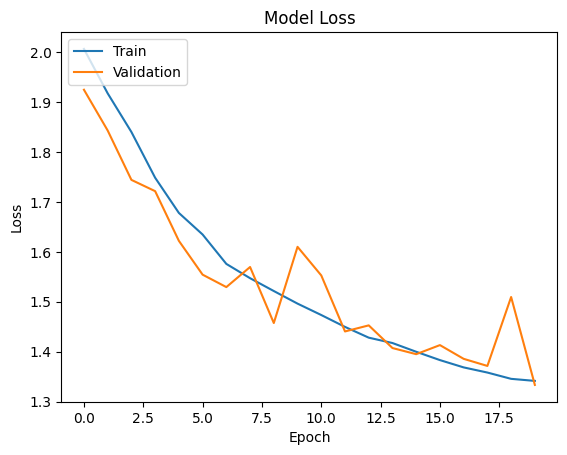

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Save the trained model
model.save('image_recognition_model.h5')